<a href="https://colab.research.google.com/github/wbjimmer/Machine-Learning/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()

In [ ]:
print(cancer.DESCR)

In [9]:
cancer.target[::100]

array([0, 0, 1, 0, 0, 1])

In [10]:
cancer.data.shape

(569, 30)

In [11]:
cancer.target.shape

(569,)

In [13]:
cancer.data[13]

array([1.585e+01, 2.395e+01, 1.037e+02, 7.827e+02, 8.401e-02, 1.002e-01,
       9.938e-02, 5.364e-02, 1.847e-01, 5.338e-02, 4.033e-01, 1.078e+00,
       2.903e+00, 3.658e+01, 9.769e-03, 3.126e-02, 5.051e-02, 1.992e-02,
       2.981e-02, 3.002e-03, 1.684e+01, 2.766e+01, 1.120e+02, 8.765e+02,
       1.131e-01, 1.924e-01, 2.322e-01, 1.119e-01, 2.809e-01, 6.287e-02])

In [14]:
import matplotlib.pyplot as plt

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=11)  # random_state for reproducibility

In [93]:
X_train.shape

(426, 30)

In [94]:
X_test.shape

(143, 30)

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn = KNeighborsClassifier()

In [98]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [99]:
predicted = knn.predict(X=X_test)

In [25]:
expected = y_test

In [26]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [27]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [28]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [29]:
wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [30]:
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


In [31]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [35]:
confusion

array([[43,  7],
       [ 1, 92]])

In [36]:
import pandas as pd

In [38]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

In [39]:
import seaborn as sns

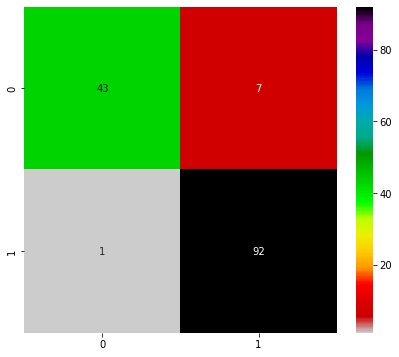

In [40]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r) 

In [41]:
from sklearn.model_selection import KFold

In [42]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [43]:
from sklearn.model_selection import cross_val_score

In [45]:
scores = cross_val_score(estimator=knn, X=cancer.data, y=cancer.target, cv=kfold)

In [46]:
scores

array([0.92982456, 0.94736842, 0.89473684, 0.92982456, 0.92982456,
       0.94736842, 0.89473684, 0.94736842, 0.94736842, 0.91071429])

In [47]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 92.79%


In [48]:
from sklearn.svm import SVC

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [52]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=cancer.data, y=cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%; standard deviation=2.01%
                 SVC: mean accuracy=91.92%; standard deviation=3.52%
          GaussianNB: mean accuracy=93.85%; standard deviation=2.75%


In [ ]:
for k in range(1, 20, 2):  # k is an odd value 1-19; odds prevent ties
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, 
        X=cancer.data, y=cancer.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=11)  # random_state for reproducibility

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
logreg = LogisticRegression()

In [107]:
logreg.fit(x_train, y_train)

NameError: ignored